<a href="https://colab.research.google.com/github/YokoyamaLab/PythonBasics/blob/main/day09_05kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day09 資料05 $k$-NN ($k$近傍法)

## 教科書の例

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 散布図に分類の様子を描画する
def plot_boundary(model, X, Y, target, xlabel, ylabel):
    cmap_dots = ListedColormap([ "#1f77b4", "#ff7f0e", "#2ca02c"])
    cmap_fills = ListedColormap([ "#c6dcec", "#ffdec2", "#cae7ca"])
    plt.figure(figsize=(5, 5))
    if model:
        XX, YY = np.meshgrid(
            np.linspace(X.min()-1, X.max()+1, 200),
            np.linspace(Y.min()-1, Y.max()+1, 200))
        pred = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        plt.pcolormesh(XX, YY, pred, cmap=cmap_fills, shading="auto")
        plt.contour(XX, YY, pred, colors="gray")
    plt.scatter(X, Y, c=target, cmap=cmap_dots)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

正解率: 100.0 %


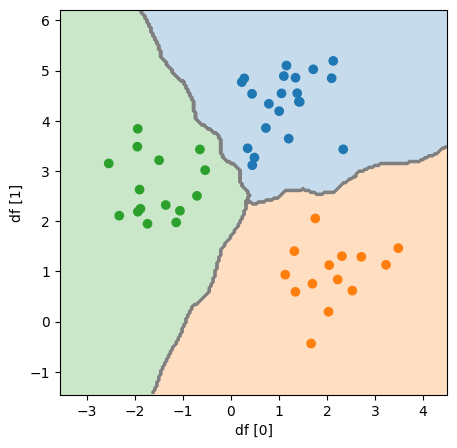

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# ランダム番号0、特徴量は2つ、塊数は3、ばらつき0.6、200個のデータセットを作る
X, y = make_blobs(
    random_state=0,
    n_features=2,
    centers=3,
    cluster_std=0.6,
    n_samples=200)

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# k近傍法の学習モデルを作る（訓練データで）
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の状態を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")

## あやめのデータ

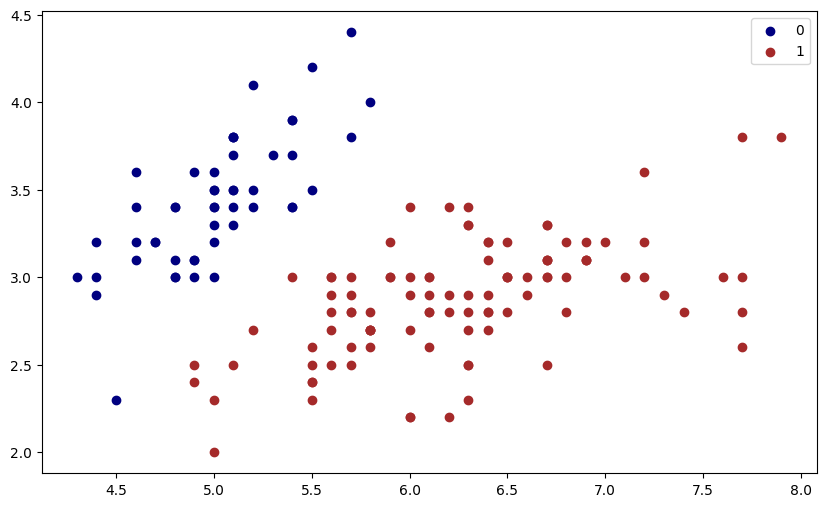

In [8]:
from sklearn.datasets import load_iris

iris = load_iris()
# sepal length と sepal width に限定
X = iris.data[:, :2]
# Iris-Setosa を 0 とし Iris-Versicolour / Iris-Virginica を 1とする
y = np.where(iris.target == 0, 0, 1)
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='navy', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='brown', label='1')
plt.legend()

# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

正解率: 100.0 %


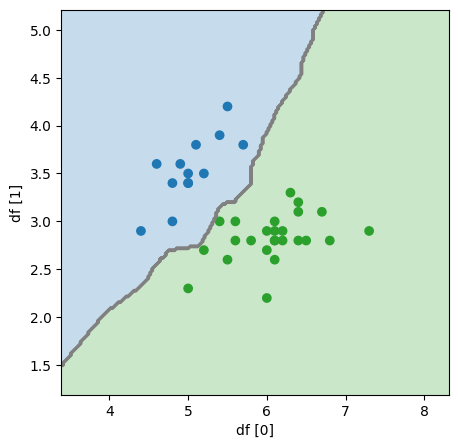

In [9]:
# 訓練データ、テストデータに分ける
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# k近傍法の学習モデルを作る（訓練データで）
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# 正解率を調べる（テストデータで）
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:", score*100, "%")

# この学習モデルの分類の状態を描画する（テストデータで）
df = pd.DataFrame(X_test)
plot_boundary(model, df[0], df[1], y_test, "df [0]", "df [1]")